In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import fsolve

**Ozon** — одна из крупнейших и наиболее известных российских компаний в сфере электронной коммерции. Основанная в 1998 году, компания стала пионером интернет-торговли в России и получила неофициальное название "русский Amazon". Сегодня Ozon предлагает разнообразный ассортимент товаров и услуг, включая электронику, одежду, продукты питания, товары для дома, книги и многое другое.

---

### Ключевая информация о компании:

1. **Дата основания:** 1998 год.  
2. **Штаб-квартира:** Москва, Россия.  
3. **Основной вид деятельности:** Электронная коммерция (e-commerce).  
4. **Биржевая информация:**  
   - С 2020 года акции компании торгуются на NASDAQ под тикером **OZON**.
   - Также представлены на Московской бирже (MOEX).  
5. **Платформа Ozon:**  
   - Является маркетплейсом, где свои товары продают как компания, так и сторонние продавцы.
   - Включает в себя B2C, B2B и C2C направления.  

---

### Деятельность:
Ozon работает по модели маркетплейса, предоставляя сторонним продавцам доступ к широкой аудитории. Компания также развивает инфраструктуру логистики и финансовых технологий, включая:  
- **Логистику:**  
  - Собственная сеть складов, пунктов выдачи заказов и партнёрских точек.  
  - Экспресс-доставка в крупные города России.  
- **Финансовые сервисы:**  
  - Финтех-направление, включая Ozon Fintech, которое предлагает кредитные продукты для покупателей и продавцов.  
- **Технологии:**  
  - Инвестиции в автоматизацию, аналитические инструменты и IT-инфраструктуру.  

---

### Основные показатели:  
- **GMV (объем продаж):** Один из ключевых показателей, отражающий рост популярности платформы.  
- **Количество активных покупателей:** Сотни миллионов заказов в год от миллионов пользователей.  
- **Ассортимент:** Более 90 миллионов товаров в разных категориях.  

---

### Стратегия и инновации:
- **Ускоренный рост маркетплейса.**  
- **Развитие Ozon Express** (доставка продуктов питания и товаров за 2 часа).  
- **Поддержка малого и среднего бизнеса:** Программы для продавцов, включая льготные условия размещения.  
- **Экологические инициативы:** Развитие упаковки из перерабатываемых материалов и снижение углеродного следа.

---

### Конкуренты:
Основные конкуренты Ozon в России:  
- Wildberries  
- Яндекс Маркет  
- AliExpress Russia  

---

### Значение компании:
Ozon является лидером цифровой трансформации в ритейле России, предлагая клиентам удобство, широкий выбор и качественный сервис. Благодаря активному росту и внедрению новых технологий, компания удерживает позиции одного из крупнейших игроков на рынке e-commerce в России и СНГ.

In [117]:
def checker(date):
    if date.month in [1, 12]:
        return True
    return False

def get_year(date):
    return date.year

def to_float(x):
    x = float(x.replace('.','').replace(',', '.'))
    return x

def to_value(x):
    x = float(x[:-1].replace('.','').replace(',', '.'))*1000
    return x

def to_perc(x):
    return float(x[:-1].replace('.','').replace(',', '.'))/100

In [118]:
data = pd.read_csv('Прошлые данные - OZONDR.csv', parse_dates=['Дата'], dayfirst=True)
data = data.sort_values(['Дата'])
data.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
997,2020-11-25,"2.954,00","3.102,00","3.282,00","2.888,00","1,29M","-2,60%"
996,2020-11-26,"2.944,00","3.002,00","3.002,00","2.900,50","194,32K","-0,34%"
995,2020-11-27,"3.025,00","2.967,50","3.082,00","2.913,00","336,31K","2,75%"
994,2020-11-30,"3.071,00","2.999,50","3.140,00","2.967,50","210,26K","1,52%"
993,2020-12-01,"3.059,50","3.048,00","3.097,00","3.000,50","150,54K","-0,37%"


In [119]:
data['Цена'] = data['Цена'].apply(to_float)
data['Откр.'] = data['Откр.'].apply(to_float)
data['Макс.'] = data['Макс.'].apply(to_float)
data['Мин.'] = data['Мин.'].apply(to_float)
# data['Объём'] = data['Объём'].apply(to_value)
data['Изм. %'] = data['Изм. %'].apply(to_perc)
data['Дата'] = data['Дата']

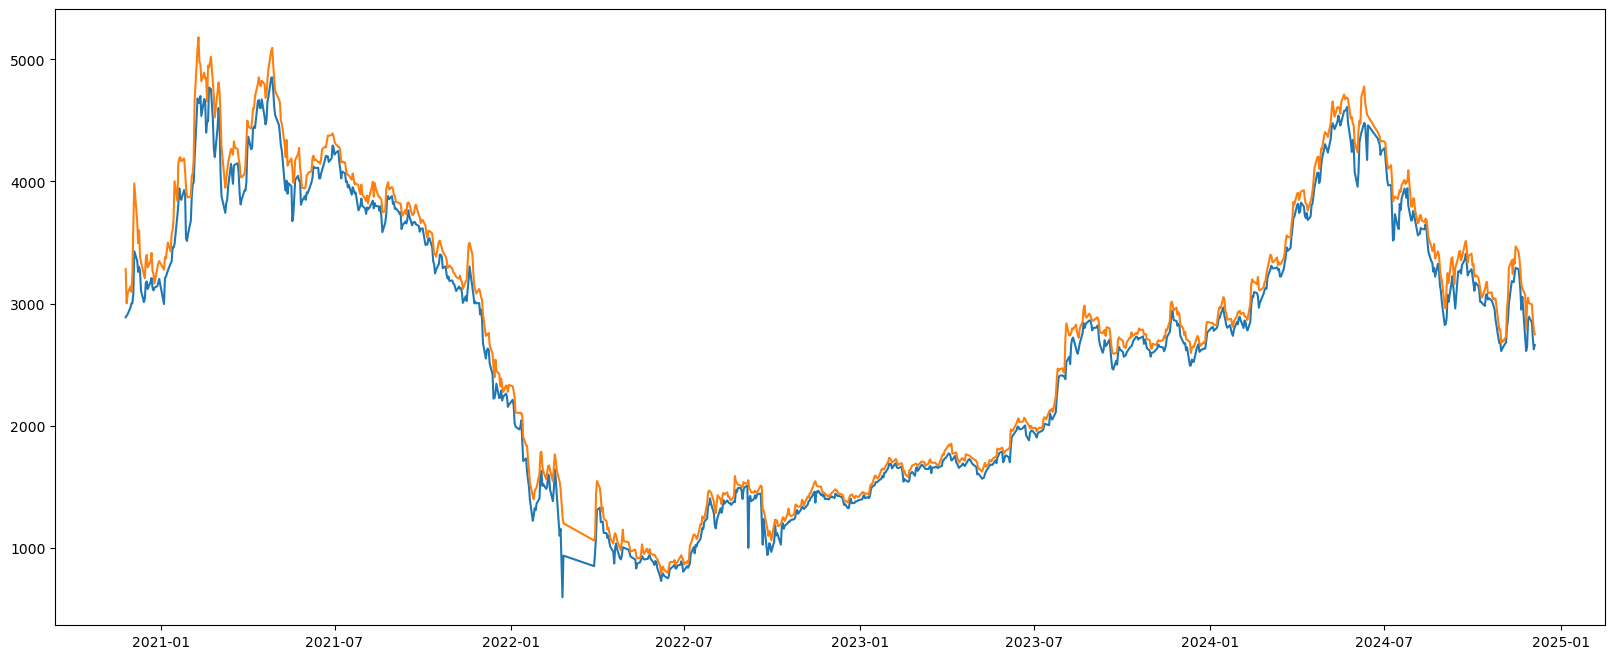

In [120]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(data['Дата'], data['Мин.'])
ax.plot(data['Дата'], data['Макс.'], alpha=1)

# ax.plot(data['Дата'], data['Изм. %'])

plt.show()

In [121]:
data1 = data[data['Дата'].apply(checker)]
data1.loc[:, 'Year'] = data1.loc[:, 'Дата'].apply(get_year)
data1 

C:\Users\ivant\AppData\Local\Temp\ipykernel_6288\909759873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.loc[:, 'Year'] = data1.loc[:, 'Дата'].apply(get_year)


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Year
993,2020-12-01,3059.5,3048.0,3097.0,3000.5,"150,54K",-0.0037,2020
992,2020-12-02,3184.0,3030.0,3230.0,3003.0,"264,44K",0.0407,2020
991,2020-12-03,3614.5,3120.5,3649.0,3085.5,"914,18K",0.1352,2020
990,2020-12-04,3556.0,3566.5,3984.0,3428.5,"1,10M",-0.0162,2020
989,2020-12-07,3422.0,3570.0,3675.0,3351.5,"404,94K",-0.0377,2020
...,...,...,...,...,...,...,...,...
211,2024-01-31,2909.5,2920.0,2932.5,2881.5,"357,71K",-0.0007,2024
3,2024-12-02,2871.5,2935.0,2993.5,2843.5,"1,03M",-0.0213,2024
2,2024-12-03,2730.5,2869.0,2874.5,2713.0,"1,71M",-0.0491,2024
1,2024-12-04,2674.5,2730.0,2786.5,2626.0,"1,59M",-0.0205,2024


In [122]:
mn = data1.loc[data1.groupby('Year')['Дата'].idxmin()][['Дата', 'Цена']].sort_values(['Дата'], ascending=False)
mx = data1.loc[data1.groupby('Year')['Дата'].idxmax()][['Дата', 'Цена']].sort_values(['Дата'], ascending=False)

mn.loc[:, 'Year'] = mn.loc[:, 'Дата'].apply(get_year)
mx.loc[:, 'Year'] = mx.loc[:, 'Дата'].apply(get_year)

mn = mn[['Цена','Year']]
mx = mx[['Цена','Year']]

m = pd.merge(mn,mx,on='Year')

m1 = m[['Цена_x','Цена_y']]
m1['Year'] = m['Year']
m1.columns = ['Цена акций начало года', 'Цена акций конец года','Год']
m1 = m1.set_index('Год')
m1 = m1.drop(2024, axis=0)
m1

,Цена акций начало года,Цена акций конец года
Год,,
2023,1438.0,2804.5
2022,2238.5,1402.0
2021,3229.5,2316.5
2020,3059.5,3289.5


In [123]:
databook = pd.read_excel('Ozon_Databook_Q3_24.xlsx', 'Public Databook', header = 4)
databook = databook.drop([i for i in databook.columns if 'Q' in i or '2018' in i or '2019' in i]+['Unnamed: 23'],axis=1)
databook.columns = ['Год']+[i[3:] for i in databook.columns[1:]]

databook = databook.drop(list(range(0,4))+list(range(9,12))+list(range(15,18))+[21,28,29,30]+list(range(36,54)),axis = 0)
display(databook['Год'].unique())

array(['GMV incl. services ',
       'Share of Marketplace, as % of GMV incl. services ',
       'Number of orders, millions', 'Number of active buyers, millions',
       'Frequency, orders', 'Total revenue ',
       '(Loss)/profit for the period', 'Adjusted EBITDA',
       'Total non-current assets', 'Total current assets',
       'Cash and cash equivalents', 'Total assets ', 'Total equity  ',
       'Total non-current liabilities ', 'Total current liabilities ',
       'Total liabilities ', 'Total equity and liabilities ',
       'Movements in working capital1',
       'Net cash (used in) / generated from operating activities1',
       'Capital expenditures',
       'Net cash (used in)/ generated from investing activities',
       'Net cash(used in)/ generated from financing activities2'],
      dtype=object)

In [124]:
databook = databook.set_index('Год')
databook = databook.T.iloc[::-1]
for i in databook.columns:
    databook[i] *= 1000000 if i not in ['Frequency, orders', f'Share of Marketplace, as % of GMV incl. services'] else databook[i]
databook['T'] = [0.2]*databook.shape[0]

shares_q = [216414000,203730000,203730000,203730000]
databook['Shares quantity'] = shares_q

databook

Год,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Total current liabilities,Total liabilities,Total equity and liabilities,Movements in working capital1,Net cash (used in) / generated from operating activities1,Capital expenditures,Net cash (used in)/ generated from investing activities,Net cash(used in)/ generated from financing activities2,T,Shares quantity
2023,1.752277e+12,831300.797018,965667008.0,46089422.0,438.987612,4.242910e+11,-4.266500e+10,4.208000e+09,1.991180e+11,2.769080e+11,...,3.418850e+11,5.426030e+11,4.760260e+11,1.086970e+11,8.359800e+10,-2.967200e+10,-2.732600e+10,1.856500e+10,0.2,216414000
2022,8.322403e+11,761522.301161,465387838.0,35169559.0,175.094141,2.771150e+11,-5.818700e+10,-3.215000e+09,1.299180e+11,1.549030e+11,...,1.948740e+11,3.014680e+11,2.848210e+11,1.247000e+09,-1.875300e+10,-3.581300e+10,-1.604000e+10,1.839400e+10,0.2,203730000
2021,4.482600e+11,647764.690135,223300000.0,25600000.0,76.084732,1.782150e+11,-5.677900e+10,-4.115600e+10,7.475200e+10,1.665860e+11,...,1.239360e+11,2.107300e+11,2.413380e+11,3.218300e+10,-1.362600e+10,-1.934100e+10,-3.540300e+10,5.389200e+10,0.2,203730000
2020,1.974139e+11,478128.156434,73872868.0,13760362.0,28.821077,1.043500e+11,-2.226400e+10,-1.171600e+10,2.980000e+10,1.248080e+11,...,6.021100e+10,7.535100e+10,1.546080e+11,2.011900e+10,6.570000e+09,-6.840000e+09,-6.580000e+09,1.025670e+11,0.2,203730000


# соединим таблички

In [125]:
databook.index=databook.index.astype('int64')


m1 = m1.reset_index()
databook = databook.reset_index()

databook = pd.merge(databook,m1,'inner',left_on='index', right_on='Год')

databook = databook.drop('index',axis=1).set_index('Год')

### 1. **CCF (Cash Conversion Flow)**:
   - **Описание:** Поток денежных средств, обычно рассчитываемый как чистый денежный поток от операционной деятельности за вычетом капитальных затрат (CapEx).
   - **Формула:**  
     $$
     \text{CCF} = \text{Net Cash from Operating Activities} - \text{Capital Expenditures}
     $$
     Или же
     $$
     \text{CCF} = \text{Shares quantity} \cdot \frac{\text{Цена акций конец года} + \text{Цена акций начало года}}{2} \cdot \frac{1}{(1+k_e)^n}
     $$
   - **Данные:**  
     - "Net cash (used in)/generated from operating activities"
     - "Capital expenditures"

---

In [126]:
databook['CCF 2'] = databook['Net cash (used in) / generated from operating activities1'] - databook['Capital expenditures']
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Movements in working capital1,Net cash (used in) / generated from operating activities1,Capital expenditures,Net cash (used in)/ generated from investing activities,Net cash(used in)/ generated from financing activities2,T,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+12,831300.797018,965667008.0,46089422.0,438.987612,4.242910e+11,-4.266500e+10,4.208000e+09,1.991180e+11,2.769080e+11,...,1.086970e+11,8.359800e+10,-2.967200e+10,-2.732600e+10,1.856500e+10,0.2,216414000,1438.0,2804.5,1.132700e+11
2022,8.322403e+11,761522.301161,465387838.0,35169559.0,175.094141,2.771150e+11,-5.818700e+10,-3.215000e+09,1.299180e+11,1.549030e+11,...,1.247000e+09,-1.875300e+10,-3.581300e+10,-1.604000e+10,1.839400e+10,0.2,203730000,2238.5,1402.0,1.706000e+10
2021,4.482600e+11,647764.690135,223300000.0,25600000.0,76.084732,1.782150e+11,-5.677900e+10,-4.115600e+10,7.475200e+10,1.665860e+11,...,3.218300e+10,-1.362600e+10,-1.934100e+10,-3.540300e+10,5.389200e+10,0.2,203730000,3229.5,2316.5,5.715000e+09
2020,1.974139e+11,478128.156434,73872868.0,13760362.0,28.821077,1.043500e+11,-2.226400e+10,-1.171600e+10,2.980000e+10,1.248080e+11,...,2.011900e+10,6.570000e+09,-6.840000e+09,-6.580000e+09,1.025670e+11,0.2,203730000,3059.5,3289.5,1.341000e+10


### 2. **$\mu$ (Рентабельность, доходность)**:
   - **Описание:** Му может относиться к рентабельности продаж или маржинальной прибыли.
   - **Формула для маржи EBITDA:**  
     $$
     \mu = \frac{\text{Adjusted EBITDA}}{\text{Total Revenue}}
     $$
   - **Данные:**  
     - "Adjusted EBITDA"
     - "Total revenue"

---

In [127]:
databook['mu'] = databook['Adjusted EBITDA'] / databook['Total revenue ']
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Net cash (used in) / generated from operating activities1,Capital expenditures,Net cash (used in)/ generated from investing activities,Net cash(used in)/ generated from financing activities2,T,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2,mu
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+12,831300.797018,965667008.0,46089422.0,438.987612,4.242910e+11,-4.266500e+10,4.208000e+09,1.991180e+11,2.769080e+11,...,8.359800e+10,-2.967200e+10,-2.732600e+10,1.856500e+10,0.2,216414000,1438.0,2804.5,1.132700e+11,0.009918
2022,8.322403e+11,761522.301161,465387838.0,35169559.0,175.094141,2.771150e+11,-5.818700e+10,-3.215000e+09,1.299180e+11,1.549030e+11,...,-1.875300e+10,-3.581300e+10,-1.604000e+10,1.839400e+10,0.2,203730000,2238.5,1402.0,1.706000e+10,-0.011602
2021,4.482600e+11,647764.690135,223300000.0,25600000.0,76.084732,1.782150e+11,-5.677900e+10,-4.115600e+10,7.475200e+10,1.665860e+11,...,-1.362600e+10,-1.934100e+10,-3.540300e+10,5.389200e+10,0.2,203730000,3229.5,2316.5,5.715000e+09,-0.230935
2020,1.974139e+11,478128.156434,73872868.0,13760362.0,28.821077,1.043500e+11,-2.226400e+10,-1.171600e+10,2.980000e+10,1.248080e+11,...,6.570000e+09,-6.840000e+09,-6.580000e+09,1.025670e+11,0.2,203730000,3059.5,3289.5,1.341000e+10,-0.112276


### 3. **t (Ставка налогообложения)**:
   - **Описание:** Средняя ставка налога, уплаченная компанией.
   - **Формула:**  
     $$
     t = \frac{\text{Income Tax Expense}}{\text{Profit Before Tax}}
     $$
   - **Данные:** Если эти строки отсутствуют, можно использовать стандартную ставку налога (например, для РФ — 20%).

---

### 4. **kd (Стоимость долга)**:
   - **Описание:** Средневзвешенная стоимость долгового капитала.
   - **Формула:**  
     $$
     k_d = \frac{\text{Interest Expense}}{\text{Total Debt}}
     $$
   - **Данные:**  
     - "Interest expense" можно найти в "PnL" или "Total liabilities".
     - "Total debt" = "Total non-current liabilities" + "Total current liabilities".

---

In [128]:
databook['k_d'] = databook['Net cash(used in)/ generated from financing activities2']/databook['Total liabilities ']
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Capital expenditures,Net cash (used in)/ generated from investing activities,Net cash(used in)/ generated from financing activities2,T,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2,mu,k_d
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+12,831300.797018,965667008.0,46089422.0,438.987612,4.242910e+11,-4.266500e+10,4.208000e+09,1.991180e+11,2.769080e+11,...,-2.967200e+10,-2.732600e+10,1.856500e+10,0.2,216414000,1438.0,2804.5,1.132700e+11,0.009918,0.034215
2022,8.322403e+11,761522.301161,465387838.0,35169559.0,175.094141,2.771150e+11,-5.818700e+10,-3.215000e+09,1.299180e+11,1.549030e+11,...,-3.581300e+10,-1.604000e+10,1.839400e+10,0.2,203730000,2238.5,1402.0,1.706000e+10,-0.011602,0.061015
2021,4.482600e+11,647764.690135,223300000.0,25600000.0,76.084732,1.782150e+11,-5.677900e+10,-4.115600e+10,7.475200e+10,1.665860e+11,...,-1.934100e+10,-3.540300e+10,5.389200e+10,0.2,203730000,3229.5,2316.5,5.715000e+09,-0.230935,0.255740
2020,1.974139e+11,478128.156434,73872868.0,13760362.0,28.821077,1.043500e+11,-2.226400e+10,-1.171600e+10,2.980000e+10,1.248080e+11,...,-6.840000e+09,-6.580000e+09,1.025670e+11,0.2,203730000,3059.5,3289.5,1.341000e+10,-0.112276,1.361190


### 5. **D (Долг)**:
   - **Описание:** Общий долг компании.
   - **Формула:**  
     $$
     D = \text{Total non-current liabilities} + \text{Total current liabilities}
     $$
   - **Данные:**  
     - "Total non-current liabilities"
     - "Total current liabilities"

---

In [129]:
databook['D'] = databook['Total liabilities ']
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Net cash (used in)/ generated from investing activities,Net cash(used in)/ generated from financing activities2,T,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2,mu,k_d,D
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+12,831300.797018,965667008.0,46089422.0,438.987612,4.242910e+11,-4.266500e+10,4.208000e+09,1.991180e+11,2.769080e+11,...,-2.732600e+10,1.856500e+10,0.2,216414000,1438.0,2804.5,1.132700e+11,0.009918,0.034215,5.426030e+11
2022,8.322403e+11,761522.301161,465387838.0,35169559.0,175.094141,2.771150e+11,-5.818700e+10,-3.215000e+09,1.299180e+11,1.549030e+11,...,-1.604000e+10,1.839400e+10,0.2,203730000,2238.5,1402.0,1.706000e+10,-0.011602,0.061015,3.014680e+11
2021,4.482600e+11,647764.690135,223300000.0,25600000.0,76.084732,1.782150e+11,-5.677900e+10,-4.115600e+10,7.475200e+10,1.665860e+11,...,-3.540300e+10,5.389200e+10,0.2,203730000,3229.5,2316.5,5.715000e+09,-0.230935,0.255740,2.107300e+11
2020,1.974139e+11,478128.156434,73872868.0,13760362.0,28.821077,1.043500e+11,-2.226400e+10,-1.171600e+10,2.980000e+10,1.248080e+11,...,-6.580000e+09,1.025670e+11,0.2,203730000,3059.5,3289.5,1.341000e+10,-0.112276,1.361190,7.535100e+10


### 6. **S (Акционерный капитал)**:
   - **Описание:** Рыночная стоимость капитала (стоимость акций).
   - **Формула:**  
     $$
     S = \text{Shares Outstanding} \times \text{Share Price}
     $$
     - Если количество акций неизвестно, используйте данные "Total equity" для оценки.
   - **Данные:**  
     - "Цена акций начало года" и "Цена акций конец года"
     - "Total equity"

---

In [130]:
databook['S'] = databook['Shares quantity']*(databook['Цена акций начало года']+databook['Цена акций конец года'])/2
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Net cash(used in)/ generated from financing activities2,T,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2,mu,k_d,D,S
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+12,831300.797018,965667008.0,46089422.0,438.987612,4.242910e+11,-4.266500e+10,4.208000e+09,1.991180e+11,2.769080e+11,...,1.856500e+10,0.2,216414000,1438.0,2804.5,1.132700e+11,0.009918,0.034215,5.426030e+11,4.590682e+11
2022,8.322403e+11,761522.301161,465387838.0,35169559.0,175.094141,2.771150e+11,-5.818700e+10,-3.215000e+09,1.299180e+11,1.549030e+11,...,1.839400e+10,0.2,203730000,2238.5,1402.0,1.706000e+10,-0.011602,0.061015,3.014680e+11,3.708395e+11
2021,4.482600e+11,647764.690135,223300000.0,25600000.0,76.084732,1.782150e+11,-5.677900e+10,-4.115600e+10,7.475200e+10,1.665860e+11,...,5.389200e+10,0.2,203730000,3229.5,2316.5,5.715000e+09,-0.230935,0.255740,2.107300e+11,5.649433e+11
2020,1.974139e+11,478128.156434,73872868.0,13760362.0,28.821077,1.043500e+11,-2.226400e+10,-1.171600e+10,2.980000e+10,1.248080e+11,...,1.025670e+11,0.2,203730000,3059.5,3289.5,1.341000e+10,-0.112276,1.361190,7.535100e+10,6.467409e+11


### 7. **L** :
   - **Описание:** Текущая ливириджность компании.
   - **Формула:**  
     $$
     L = \frac{\text{D}}{\text{S}}
     $$


---

In [131]:
databook['L'] = databook['D']/databook['S']
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,T,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2,mu,k_d,D,S,L
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+12,831300.797018,965667008.0,46089422.0,438.987612,4.242910e+11,-4.266500e+10,4.208000e+09,1.991180e+11,2.769080e+11,...,0.2,216414000,1438.0,2804.5,1.132700e+11,0.009918,0.034215,5.426030e+11,4.590682e+11,1.181966
2022,8.322403e+11,761522.301161,465387838.0,35169559.0,175.094141,2.771150e+11,-5.818700e+10,-3.215000e+09,1.299180e+11,1.549030e+11,...,0.2,203730000,2238.5,1402.0,1.706000e+10,-0.011602,0.061015,3.014680e+11,3.708395e+11,0.812934
2021,4.482600e+11,647764.690135,223300000.0,25600000.0,76.084732,1.782150e+11,-5.677900e+10,-4.115600e+10,7.475200e+10,1.665860e+11,...,0.2,203730000,3229.5,2316.5,5.715000e+09,-0.230935,0.255740,2.107300e+11,5.649433e+11,0.373011
2020,1.974139e+11,478128.156434,73872868.0,13760362.0,28.821077,1.043500e+11,-2.226400e+10,-1.171600e+10,2.980000e+10,1.248080e+11,...,0.2,203730000,3059.5,3289.5,1.341000e+10,-0.112276,1.361190,7.535100e+10,6.467409e+11,0.116509


### 8. **$k_e$**:
   - **Формула:**  
     $$
     k_e = \frac{\text{Цена в конце} - \text{Цена в начале}}{\text{Цена в начале}}
     $$


---

In [132]:
databook['k_e'] = (databook['Цена акций конец года'] - databook['Цена акций начало года'])/databook['Цена акций начало года']
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2,mu,k_d,D,S,L,k_e
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+12,831300.797018,965667008.0,46089422.0,438.987612,4.242910e+11,-4.266500e+10,4.208000e+09,1.991180e+11,2.769080e+11,...,216414000,1438.0,2804.5,1.132700e+11,0.009918,0.034215,5.426030e+11,4.590682e+11,1.181966,0.950278
2022,8.322403e+11,761522.301161,465387838.0,35169559.0,175.094141,2.771150e+11,-5.818700e+10,-3.215000e+09,1.299180e+11,1.549030e+11,...,203730000,2238.5,1402.0,1.706000e+10,-0.011602,0.061015,3.014680e+11,3.708395e+11,0.812934,-0.373688
2021,4.482600e+11,647764.690135,223300000.0,25600000.0,76.084732,1.782150e+11,-5.677900e+10,-4.115600e+10,7.475200e+10,1.665860e+11,...,203730000,3229.5,2316.5,5.715000e+09,-0.230935,0.255740,2.107300e+11,5.649433e+11,0.373011,-0.282706
2020,1.974139e+11,478128.156434,73872868.0,13760362.0,28.821077,1.043500e+11,-2.226400e+10,-1.171600e+10,2.980000e+10,1.248080e+11,...,203730000,3059.5,3289.5,1.341000e+10,-0.112276,1.361190,7.535100e+10,6.467409e+11,0.116509,0.075176


In [133]:
databook['CCF 1'] = databook['Shares quantity']*(databook['Цена акций конец года'] + databook['Цена акций начало года'])/2 * 1/(databook['k_e']+1)**(2023 - databook.index)
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Цена акций начало года,Цена акций конец года,CCF 2,mu,k_d,D,S,L,k_e,CCF 1
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+12,831300.797018,965667008.0,46089422.0,438.987612,4.242910e+11,-4.266500e+10,4.208000e+09,1.991180e+11,2.769080e+11,...,1438.0,2804.5,1.132700e+11,0.009918,0.034215,5.426030e+11,4.590682e+11,1.181966,0.950278,4.590682e+11
2022,8.322403e+11,761522.301161,465387838.0,35169559.0,175.094141,2.771150e+11,-5.818700e+10,-3.215000e+09,1.299180e+11,1.549030e+11,...,2238.5,1402.0,1.706000e+10,-0.011602,0.061015,3.014680e+11,3.708395e+11,0.812934,-0.373688,5.921001e+11
2021,4.482600e+11,647764.690135,223300000.0,25600000.0,76.084732,1.782150e+11,-5.677900e+10,-4.115600e+10,7.475200e+10,1.665860e+11,...,3229.5,2316.5,5.715000e+09,-0.230935,0.255740,2.107300e+11,5.649433e+11,0.373011,-0.282706,1.098021e+12
2020,1.974139e+11,478128.156434,73872868.0,13760362.0,28.821077,1.043500e+11,-2.226400e+10,-1.171600e+10,2.980000e+10,1.248080e+11,...,3059.5,3289.5,1.341000e+10,-0.112276,1.361190,7.535100e+10,6.467409e+11,0.116509,0.075176,5.203458e+11


### 9. **$k_0$**:
   - **Формула:**  
     $$
     k_0 = \frac{k_e + L \cdot k_d \cdot(1 - T)}{1+L\cdot(1-T)}
     $$


---

In [134]:
databook['k_0'] = (databook['k_e'] + databook['L']*databook['k_d']*(1 - databook['T']))/(1+databook['L']*(1 - databook['T']))
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Цена акций конец года,CCF 2,mu,k_d,D,S,L,k_e,CCF 1,k_0
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+12,831300.797018,965667008.0,46089422.0,438.987612,4.242910e+11,-4.266500e+10,4.208000e+09,1.991180e+11,2.769080e+11,...,2804.5,1.132700e+11,0.009918,0.034215,5.426030e+11,4.590682e+11,1.181966,0.950278,4.590682e+11,0.505060
2022,8.322403e+11,761522.301161,465387838.0,35169559.0,175.094141,2.771150e+11,-5.818700e+10,-3.215000e+09,1.299180e+11,1.549030e+11,...,1402.0,1.706000e+10,-0.011602,0.061015,3.014680e+11,3.708395e+11,0.812934,-0.373688,5.921001e+11,-0.202386
2021,4.482600e+11,647764.690135,223300000.0,25600000.0,76.084732,1.782150e+11,-5.677900e+10,-4.115600e+10,7.475200e+10,1.665860e+11,...,2316.5,5.715000e+09,-0.230935,0.255740,2.107300e+11,5.649433e+11,0.373011,-0.282706,1.098021e+12,-0.158957
2020,1.974139e+11,478128.156434,73872868.0,13760362.0,28.821077,1.043500e+11,-2.226400e+10,-1.171600e+10,2.980000e+10,1.248080e+11,...,3289.5,1.341000e+10,-0.112276,1.361190,7.535100e+10,6.467409e+11,0.116509,0.075176,5.203458e+11,0.184821


### 10. **$w_d$**:
   - **Формула:**  
     $$
     w_d = \frac{D}{D+S}
     $$


---

In [135]:
databook['w_d'] = databook['D']/(databook['D'] + databook['S'])
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,CCF 2,mu,k_d,D,S,L,k_e,CCF 1,k_0,w_d
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+12,831300.797018,965667008.0,46089422.0,438.987612,4.242910e+11,-4.266500e+10,4.208000e+09,1.991180e+11,2.769080e+11,...,1.132700e+11,0.009918,0.034215,5.426030e+11,4.590682e+11,1.181966,0.950278,4.590682e+11,0.505060,0.541698
2022,8.322403e+11,761522.301161,465387838.0,35169559.0,175.094141,2.771150e+11,-5.818700e+10,-3.215000e+09,1.299180e+11,1.549030e+11,...,1.706000e+10,-0.011602,0.061015,3.014680e+11,3.708395e+11,0.812934,-0.373688,5.921001e+11,-0.202386,0.448408
2021,4.482600e+11,647764.690135,223300000.0,25600000.0,76.084732,1.782150e+11,-5.677900e+10,-4.115600e+10,7.475200e+10,1.665860e+11,...,5.715000e+09,-0.230935,0.255740,2.107300e+11,5.649433e+11,0.373011,-0.282706,1.098021e+12,-0.158957,0.271674
2020,1.974139e+11,478128.156434,73872868.0,13760362.0,28.821077,1.043500e+11,-2.226400e+10,-1.171600e+10,2.980000e+10,1.248080e+11,...,1.341000e+10,-0.112276,1.361190,7.535100e+10,6.467409e+11,0.116509,0.075176,5.203458e+11,0.184821,0.104351


### 11. **$WACC$**:
   - **Формула:**  
     $$
     \frac{1-(1+WACC)^{-n}}{WACC} = \frac{1-(1+k_0)^{-n}}{k_0 \cdot (1 - w_d t[1-(1+k_d)^{-n}])} 
     $$


---

2020 :0.499665428458950
2021 :0.497472271130620
2022 :0.496025963667137
2023 :0.494838048106725


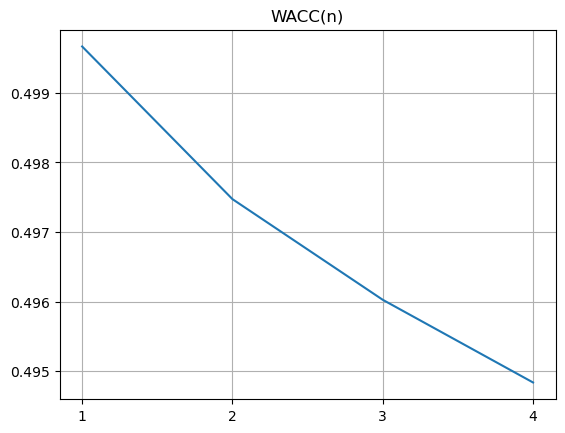

In [136]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator,MultipleLocator


def equation(wacc,n,f1):
    return (1-(1+wacc)**(-n))/wacc-f1
time = 2019

W, k_0, k_d, w_d , n, T = symbols('W, k_0, k_d, w_d, n, T')

f = (1-(1+k_0)**(-n))/(k_0*(1-w_d*T * (1-(1+k_d)**(-n))))

N_ = []
waccs0 = []
for i in databook.index[::-1]:
    n_=i - time
    print(i,':',end='')
    if i:
        f1 = f.subs({n:n_, k_0:databook.loc[2023,'k_0'], k_d:databook.loc[2023,'k_d'], w_d:databook.loc[2023,'w_d'], T:databook.loc[2023,'T']})
        sols = [root.evalf() for root in solve((1-(1+W)**(-n_))/W-f1) if root.is_real and abs(root)<=1]
        waccs0.extend(sols)
   
    if sols==[]:
        waccs0.append(0)
        print(0)
    else:
        print(*sols)
    N_.append(n_)


fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.plot(N_,waccs0)
ax.grid()
plt.title('WACC(n)')
plt.show()

In [137]:
databook['WACC'] = waccs0

2020 :0.499665428458950
2021 :0.497472271130620
2022 :0.496025963667137
2023 :0.494838048106725
2024 :0.493748682330397
2025 :0.492693089615003
2026 :0.491642992828668
2027 :0.490586813589494
2028 :0.489521460327363


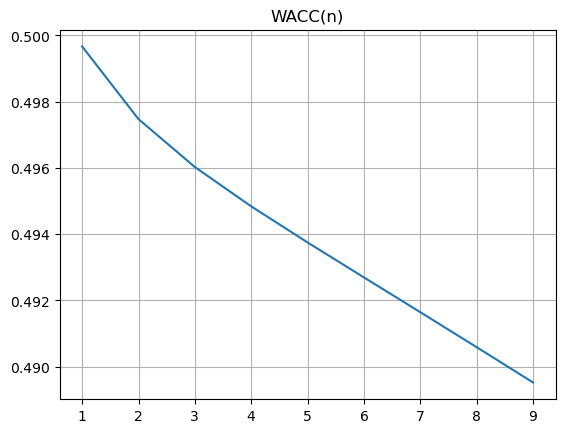

In [138]:
time = 2019

W, k_0, k_d, w_d , n, T = symbols('W, k_0, k_d, w_d, n, T')

f = (1-(1+k_0)**(-n))/(k_0*(1-w_d*T * (1-(1+k_d)**(-n))))

N_ = []
waccs5 = []
for i in list(databook.index[::-1]) + list(range(databook.index[::-1][-1]+1,databook.index[::-1][-1]+6)):
    n_=i - time
    print(i,':',end='')
    '''if i in list(databook.index[::-1]):
        f1 = f.subs({n:n_, k_0:databook.loc[2023,'k_0'], k_d:databook.loc[:,'k_d'][i], w_d:databook.loc[:,'w_d'][i], T:databook.loc[:,'T'][i]})
        sols = [root.evalf() for root in solve((1-(1+W)**(-n_))/W-f1) if root.is_real and abs(root)<=1]
        waccs.extend(sols)
    else:'''
    if i:
        f1 = f.subs({n:n_, k_0:databook.loc[2023,'k_0'], k_d:databook.loc[2023,'k_d'], w_d:databook.loc[2023,'w_d'], T:databook.loc[2023,'T']})
        sols = [root.evalf() for root in solve((1-(1+W)**(-n_))/W-f1) if root.is_real and abs(root)<=1]
        waccs5.extend(sols)
   
    if sols==[]:
        waccs5.append(0)
        print(0)
    else:
        print(*sols)
    N_.append(n_)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.plot(N_,waccs5)
ax.grid()
plt.title('WACC(n)')
plt.show()

2020 :0.499665428458950
2021 :0.497472271130620
2022 :0.496025963667137
2023 :0.494838048106725
2024 :0.493748682330397
2025 :0.492693089615003
2026 :0.491642992828668
2027 :0.490586813589494
2028 :0.489521460327363
2029 :0.488448339973515
2030 :0.487371171475608
2031 :0.486294688000237
2032 :0.485223840849869
2033 :0.484163318773233


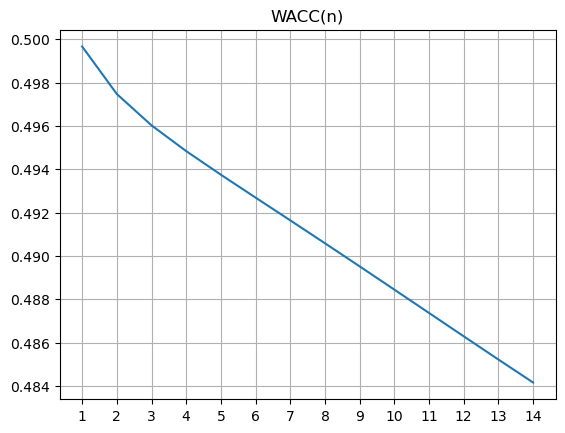

In [139]:
time = 2019

W, k_0, k_d, w_d , n, T = symbols('W, k_0, k_d, w_d, n, T')

f = (1-(1+k_0)**(-n))/(k_0*(1-w_d*T * (1-(1+k_d)**(-n))))

N_ = []
waccs10 = []
for i in list(databook.index[::-1]) + list(range(databook.index[::-1][-1]+1,databook.index[::-1][-1]+11)):
    n_=i - time
    print(i,':',end='')
    '''if i in list(databook.index[::-1]):
        f1 = f.subs({n:n_, k_0:databook.loc[2023,'k_0'], k_d:databook.loc[:,'k_d'][i], w_d:databook.loc[:,'w_d'][i], T:databook.loc[:,'T'][i]})
        sols = [root.evalf() for root in solve((1-(1+W)**(-n_))/W-f1) if root.is_real and abs(root)<=1]
        waccs.extend(sols)
    else:'''
    if i:
        f1 = f.subs({n:n_, k_0:databook.loc[2023,'k_0'], k_d:databook.loc[2023,'k_d'], w_d:databook.loc[2023,'w_d'], T:databook.loc[2023,'T']})
        sols = [root.evalf() for root in solve((1-(1+W)**(-n_))/W-f1) if root.is_real and abs(root)<=1]
        waccs10.extend(sols)
   
    if sols==[]:
        waccs10.append(0)
        print(0)
    else:
        print(*sols)
    N_.append(n_)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.plot(N_,waccs10)
ax.grid()
plt.title('WACC(n)')
plt.show()

In [140]:
c = dict()
for i in databook.index:
    c[i] = databook['CCF 1'][i]
    if i!=databook.index[0]:

        for n in range(databook.index[0]-i):
            c[i] *= (1+databook['WACC'][i+n+1])

print(sum(c.values()))

5561027715438.70


In [141]:
c = dict()
for i in databook.index:
    c[i] = databook['CCF 2'][i]
    if i!=databook.index[0]:

        for n in range(databook.index[0]-i):
            c[i] *= (1+databook['WACC'][i+n+1])

print(sum(c.values()))

196741236374.203


In [142]:
def rrstr(x,n): # округление до n знаков после запятой
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

print(*np.vectorize(rrstr)(waccs0,5),sep='\n')

0,49967
0,49747
0,49603
0,49484


In [143]:
databook.loc[list(databook.index[::-1])].T

Год,2020,2021,2022,2023
GMV incl. services,197413948486.131012,448260000000.0,832240336815.215698,1752276670313.126709
"Share of Marketplace, as % of GMV incl. services",478128.156434,647764.690135,761522.301161,831300.797018
"Number of orders, millions",73872868.0,223300000.0,465387838.0,965667008.0
"Number of active buyers, millions",13760362.0,25600000.0,35169559.0,46089422.0
"Frequency, orders",28.821077,76.084732,175.094141,438.987612
Total revenue,104350000000.0,178215000000.0,277115000000.0,424291000000.0
(Loss)/profit for the period,-22264000000.0,-56779000000.0,-58187000000.0,-42665000000.0
Adjusted EBITDA,-11716000000.0,-41156000000.0,-3215000000.0,4208000000.0
Total non-current assets,29800000000.0,74752000000.0,129918000000.0,199118000000.0
Total current assets,124808000000.0,166586000000.0,154903000000.0,276908000000.0


In [144]:
databook.loc[list(databook.index[::-1])].T.to_excel('Ozon_T.xlsx')

# via CCF 1

In [145]:
from functools import reduce
c = dict()
w = set()
for i in range(len(waccs5[-5:]))[::-1]:
    c[i] = databook['CCF 1'][2023]
    for n in range(len(waccs5[-5:])-i):
        c[i] /= (1+waccs5[-5:][n])

    w.add((1+waccs5[-5:][i]))

v1 = sum(c.values())
w=list(w)[::-1]
v2 = databook['CCF 1'][2023] / reduce(lambda x,y : x*y,w ) / waccs5[-1]
v = v1+v2
display(v1,v2,v)

806006624350.137

126995543879.290

933002168229.427

In [146]:
c = dict()
w = set()
for i in range(len(waccs10[-10:]))[::-1]:
    c[i] = databook['CCF 1'][2023]
    for n in range(len(waccs10[-10:])-i):
        c[i] /= (1+waccs10[-10:][n])

    w.add((1+waccs10[-10:][i]))

v1 = sum(c.values())
w=list(w)[::-1]
v2 = databook['CCF 1'][2023] / reduce(lambda x,y : x*y,w ) / waccs10[-1]
v = v1+v2
display(v1,v2,v)

916038287339.876

17702584570.3661

933740871910.242

# via CCF 2

In [147]:
from functools import reduce
c = dict()
w = set()
for i in range(len(waccs5[-5:]))[::-1]:
    c[i] = databook['CCF 2'][2023]
    for n in range(len(waccs5[-5:])-i):
        c[i] /= (1+waccs5[-5:][n])

    w.add((1+waccs5[-5:][i]))

v1 = sum(c.values())
w=list(w)[::-1]
v2 = databook['CCF 2'][2023] / reduce(lambda x,y : x*y,w ) / waccs5[-1]
v = v1+v2
display(v1,v2,v)

198873219354.604

31334745760.0940

230207965114.698

In [148]:
c = dict()
w = set()
for i in range(len(waccs10[-10:]))[::-1]:
    c[i] = databook['CCF 2'][2023]
    for n in range(len(waccs10[-10:])-i):
        c[i] /= (1+waccs10[-10:][n])

    w.add((1+waccs10[-10:][i]))

v1 = sum(c.values())
w=list(w)[::-1]
v2 = databook['CCF 2'][2023] / reduce(lambda x,y : x*y,w ) / waccs10[-1]
v = v1+v2
display(v1,v2,v)

226022315141.941

4367916935.22914

230390232077.170